In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_datareader import data as web
import plotly.graph_objects as go
%matplotlib inline
import mplfinance as mpf
import plotly.graph_objects as go

In [2]:
path='/Users/qurbamushtaq/Desktop/stocks.xlsx'

In [3]:
df=pd.read_excel(path)

In [4]:
def lower(df):
    df.columns=df.columns.str.lower()
    return df.columns


In [5]:
apple=pd.read_excel(path,sheet_name='AAPL_data')
amazon=pd.read_excel(path,sheet_name='AMZN_data')
google=pd.read_excel(path,sheet_name='GOOG_data')
microsoft=pd.read_excel(path,sheet_name='MSFT_data')

In [6]:
print(apple.head(3))

        date     open     high      low    close     volume  Name
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL


In [7]:
apple.columns=lower(apple)
amazon.columns=lower(amazon)
google.columns=lower(google)
microsoft.columns=lower(microsoft)

In [8]:
print(microsoft.head(3))

        date   open   high    low  close    volume  name
0 2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1 2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2 2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT


In [9]:
print(amazon.head(4))

        date    open    high      low   close   volume  name
0 2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1 2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2 2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3 2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN


# The Data Analysis For Google Data:


In [10]:
print(google.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'name'], dtype='object')


# The opening of Google stocks over year


In [56]:
 fig = go.Figure(data=go.Scatter(x=google['date'],y=google['open'], mode='lines'))
#  Customize the line color
fig.update_traces(line=dict(color='pink'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Opening Stock')


fig.show()

# Closing of the Google Stocks over Year

In [12]:
fig = go.Figure(data=go.Scatter(x=google['date'],y=google['close'], mode='lines'))
# Customize the line color
fig.update_traces(line=dict(color='green'))
fig.update_layout(plot_bgcolor='black')

# Customizing the labels of x/y axis
fig.update_layout(xaxis_title='Date')

fig.update_layout(yaxis_title='Closing Stock')

fig.show()

# The highest values during different year

In [13]:
fig = go.Figure(data=go.Scatter(x=google['date'],y=google['high'], mode='lines'))
# Customize the line color
fig.update_traces(line=dict(color='blue'))

# Customize the background color
fig.update_layout(plot_bgcolor='light gray')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='High values')

# Customize the grid line color
fig.update_layout(
    xaxis=dict(
        gridcolor='red' 
    ),
    yaxis=dict(
        gridcolor='blue'  #
    )
)

fig.show()

# The lowest value during different Years


In [14]:
fig = go.Figure(data=go.Scatter(x=google['date'],y=google['low'], mode='lines'))
# Customize the line color
fig.update_traces(line=dict(color='white'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Low values')

# Customize the grid line color
fig.update_layout(
    xaxis=dict(
        gridcolor='white' 
    ),
    yaxis=dict(
        gridcolor='white'  #
    )
)

fig.show()

# Comparision between high and low values over the years


In [15]:

fig = go.Figure()
#Low
fig.add_trace(go.Scatter(
    x=google['date'],
    y=google['low'],
    mode='lines',
    name='Low',
    line=dict(color='pink')
))

# High
fig.add_trace(go.Scatter(
    x=google['date'],
    y=google['high'],
    mode='lines',
    name='High',
    line=dict(color='blue')
))

# Customize the layout
fig.update_layout(
    title='Stock Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True
)
fig.update_layout(plot_bgcolor='black')

fig.show()


The closely aligned high and low stock prices of Google suggest a pattern of consistency in the company's growth trajectory. This indicates that Google has demonstrated stability in its market performance, maintaining a steady course of development. Such consistency in stock prices is indicative of the company's ability to effectively manage its operations, adapt to market dynamics, and sustain its product offerings in a rapidly evolving industry.

In [22]:
google['year'] = google['date'].dt.year
avgVolume=google.groupby('year')['volume'].mean().reset_index()
abgVolumeYr=avgVolume['year']
avgVolumeMean=avgVolume['volume']
fig = px.bar(data_frame=avgVolume, x=abgVolumeYr, y=avgVolumeMean, orientation='v', title="Average Mean of Stock Volume over the years", color="year")
fig.show(renderer="notebook_connected")

In [23]:
google['year'] = google['date'].dt.year
avgVolume=google.groupby('year')['close'].mean().reset_index()
abgVolumeYr=avgVolume['year']
avgcloseMean=avgVolume['close']
fig = px.bar(data_frame=avgVolume, x=abgVolumeYr, y=avgcloseMean, orientation='v', title="Average Mean of Stock Closing value over the years", color="year")
fig.show(renderer="notebook_connected")

In [24]:
google['year'] = google['date'].dt.year
avgVolume=google.groupby('year')['open'].mean().reset_index()
abgVolumeYr=avgVolume['year']
avgopenMean=avgVolume['open']
fig = px.bar(data_frame=avgVolume, x=abgVolumeYr, y=avgopenMean, orientation='v', title="Average Mean of Stock Opening value over the years", color="year")
fig.show(renderer="notebook_connected")

In [26]:
google['year'] = google['date'].dt.year
avgVolume=google.groupby('year')['low'].mean().reset_index()
abgVolumeYr=avgVolume['year']
avglowMean=avgVolume['low']
fig = px.bar(data_frame=avgVolume, x=abgVolumeYr, y=avglowMean, orientation='v', title="Average Mean of Stock Low value over the years", color="year")
fig.show(renderer="notebook_connected")

In [27]:
google['year'] = google['date'].dt.year
avgVolume=google.groupby('year')['high'].mean().reset_index()
abgVolumeYr=avgVolume['year']
avghighMean=avgVolume['high']
fig = px.bar(data_frame=avgVolume, x=abgVolumeYr, y=avghighMean, orientation='v', title="Average Mean of Stock High value over the years", color="year")
fig.show(renderer="notebook_connected")

Index([2014, 2015, 2016, 2017, 2018], dtype='int32', name='year')


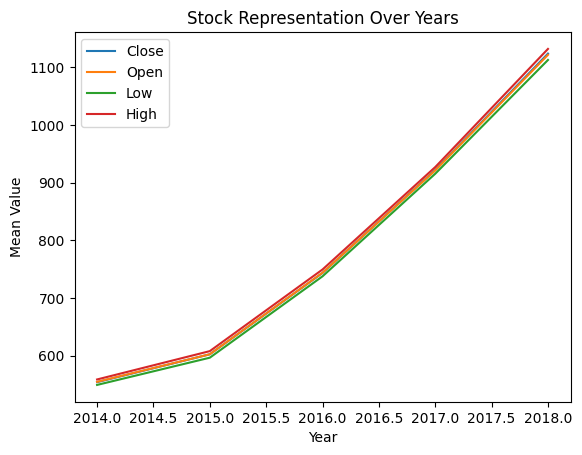

In [63]:
google['year'] = google['date'].dt.year
#mean value of the close values:
closeMean=google.groupby('year')['close'].mean()

# mean value of the open values:
openMean=google.groupby('year')['open'].mean()
#mean value of the low values:
lowMean=google.groupby('year')['low'].mean()

#mean value of the high values:
highMean=google.groupby('year')['high'].mean()


# print(closeMean)
# print(openMean)
# print(lowMean)
# print(highMean)

# Plotting the mean values
plt.plot(closeMean.index, closeMean, label='Close')
plt.plot(openMean.index, openMean, label='Open')
plt.plot(lowMean.index, lowMean, label='Low')
plt.plot(highMean.index, highMean, label='High')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Stock Representation Over Years')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()



# fig = go.Figure()
# #Low
# fig.add_trace(go.Scatter(
#     x=google['year'],
#     y=closeMean,
#     mode='lines',
#     name='Low',
#     line=dict(color='pink')
# ))

# # High
# fig.add_trace(go.Scatter(
#     x=google['year'],
#     y=openMean,
#     mode='lines',
#     name='Open',
#     line=dict(color='blue')
# ))

# # High
# fig.add_trace(go.Scatter(
#     x=google['year'],
#     y=openMean,
#     mode='lines',
#     name='High',
#     line=dict(color='blue')
# ))

# # High
# fig.add_trace(go.Scatter(
#     x=google['year'],
#     y=voluMean,
#     mode='lines',
#     name='volume',
#     line=dict(color='blue')
# ))

# # Customize the layout
# fig.update_layout(
#     title='Stock Prices',
#     xaxis_title='Date',
#     yaxis_title='Price',
#     showlegend=True
# )
# fig.update_layout(plot_bgcolor='black')

# fig.show()





# The stock analysis of Apple

# The opening stock of Apple:


In [57]:
 fig = go.Figure(data=go.Scatter(x=apple['date'],y=apple['open'], mode='lines'))
#  Customize the line color
fig.update_traces(line=dict(color='pink'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Opening Stock')


fig.show()

# The closing stock of Apple


In [58]:
 fig = go.Figure(data=go.Scatter(x=apple['date'],y=apple['close'], mode='lines'))
#  Customize the line color
fig.update_traces(line=dict(color='pink'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Closing Stock')


fig.show()

# The highest values over the year

In [59]:
fig = go.Figure(data=go.Scatter(x=apple['date'],y=apple['high'], mode='lines'))
# Customize the line color
fig.update_traces(line=dict(color='blue'))

# Customize the background color
fig.update_layout(plot_bgcolor='light gray')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='High values')

# Customize the grid line color
fig.update_layout(
    xaxis=dict(
        gridcolor='red' 
    ),
    yaxis=dict(
        gridcolor='blue'  #
    )
)

fig.show()

# Lowest price over the year


In [60]:
fig = go.Figure(data=go.Scatter(x=apple['date'],y=apple['low'], mode='lines'))
# Customize the line color
fig.update_traces(line=dict(color='white'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Low values')

# Customize the grid line color
fig.update_layout(
    xaxis=dict(
        gridcolor='white' 
    ),
    yaxis=dict(
        gridcolor='white'  #
    )
)

fig.show()

# Comparision of low and high prices over the year


In [61]:

fig = go.Figure()
#Low
fig.add_trace(go.Scatter(
    x=apple['date'],
    y=apple['low'],
    mode='lines',
    name='Low',
    line=dict(color='pink')
))

# High
fig.add_trace(go.Scatter(
    x=apple['date'],
    y=apple['high'],
    mode='lines',
    name='High',
    line=dict(color='blue')
))

# Customize the layout
fig.update_layout(
    title='Stock Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True
)
fig.update_layout(plot_bgcolor='black')

fig.show()


# Average mean of Volume of Apple Stock over the years

In [62]:
apple['year'] = apple['date'].dt.year
avgVolume=apple.groupby('year')['volume'].mean().reset_index()
abgVolumeYr=avgVolume['year']
avgVolumeMean=avgVolume['volume']
fig = px.bar(data_frame=avgVolume, x=abgVolumeYr, y=avgVolumeMean, orientation='v', title="Average Mean of Stock Volume over the years", color="year")
fig.show(renderer="notebook_connected")

# comparasion of the average mean of closing, opening, low and high stocks value


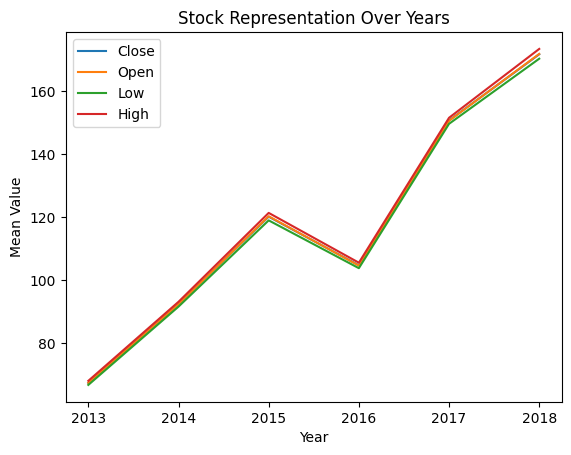

In [65]:
apple['year'] = apple['date'].dt.year
#mean value of the close values:
closeMean=apple.groupby('year')['close'].mean()

# mean value of the open values:
openMean=apple.groupby('year')['open'].mean()
#mean value of the low values:
lowMean=apple.groupby('year')['low'].mean()

#mean value of the high values:
highMean=apple.groupby('year')['high'].mean()


# print(closeMean)
# print(openMean)
# print(lowMean)
# print(highMean)

# Plotting the mean values
plt.plot(closeMean.index, closeMean, label='Close')
plt.plot(openMean.index, openMean, label='Open')
plt.plot(lowMean.index, lowMean, label='Low')
plt.plot(highMean.index, highMean, label='High')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Stock Representation Over Years')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


# The stock Analysis of Microsoft

# Opening price of Microsoft Stock

In [99]:
microsoft['year']=microsoft['date'].dt.year
fig = go.Figure(data=go.Scatter(x=microsoft['date'],y=microsoft['open'], mode='lines'))
#  Customize the line color
fig.update_traces(line=dict(color='pink'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Opening Stock')


fig.show()

# Closings stock value of Microsoft

In [71]:
fig=go.Figure(data=go.Scatter(x=microsoft['date'],y=microsoft['close'],mode='lines'))

fig.update_traces(line=dict(color='blue'))
fig.update_layout(plot_bgcolor='gray')

fig.update_layout(xaxis_title='Date')
fig.update_layout(yaxis_title='Closing Value')

fig.show()

# The lowest stock prices of Microsoft


In [85]:
fig=go.Figure(data=go.Scatter(x=microsoft['date'],y=microsoft['low'],mode='lines'))
fig.update_layout(plot_bgcolor='black')
fig.update_traces(line=dict(color='yellow'))
fig.update_layout(xaxis_title='year')
fig.update_layout(yaxis_title='Opening stocks')
fig.show()

# The highest stock prices of Microsoft


In [89]:
fig=go.Figure(data=go.Scatter(x=microsoft['date'],y=microsoft['high'],mode='lines'))
fig.update_layout(plot_bgcolor='blue')
fig.update_traces(line=dict(color='yellow'))
fig.update_layout(xaxis_title='year')
fig.update_layout(yaxis_title='Opening stocks')
fig.show()

# Stock Analysis of Amazon

# Opening stock of Amazon

In [97]:
amazon['year']=amazon['date'].dt.year
fig = go.Figure(data=go.Scatter(x=microsoft['date'],y=microsoft['open'], mode='lines'))
#  Customize the line color
fig.update_traces(line=dict(color='pink'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Opening Stock')


fig.show()

# Closing stock of Amazon

In [73]:
# fig=go.Figure(data=go.Scatter(x=amazon['date'],y=amazon['close'],mode='lines'))

fig.update_traces(line=dict(color='green'))
fig.update_layout(plot_bgcolor='light gray')

fig.update_layout(xaxis_title='Date')
fig.update_layout(yaxis_title='Closing Value')

fig.show()

# The lowest stock prices of Amazon

In [86]:
fig=go.Figure(data=go.Scatter(x=amazon['date'],y=amazon['low'],mode='lines'))
fig.update_layout(plot_bgcolor='black')
fig.update_traces(line=dict(color='yellow'))
fig.update_layout(xaxis_title='year')
fig.update_layout(yaxis_title='Opening stocks')
fig.show()

# The highest stock price of Amazon


In [91]:
 fig = go.Figure(data=go.Scatter(x=amazon['date'],y=amazon['high'], mode='lines'))
#  Customize the line color
fig.update_traces(line=dict(color='pink'))

# Customize the background color
fig.update_layout(plot_bgcolor='black')

# Customize the x-axis label
fig.update_layout(xaxis_title='Date')

# Customize the y-axis label
fig.update_layout(yaxis_title='Opening Stock')


fig.show()

# Combining the all 4 datas: Amazon, Microsoft, Google and Apple

## 1- Combining The opening price of all of them

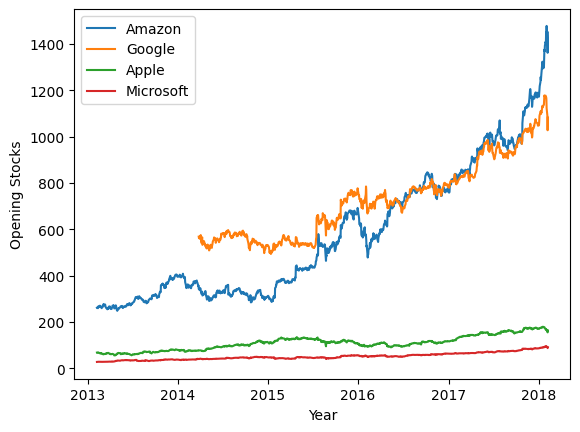

In [117]:
amazonOpen=amazon.groupby('year')['open']
googleOpen=google.groupby('year')['open']
microOpen=microsoft.groupby('year')['open']
appleOpen=apple.groupby('year')['open']

plt.plot(amazon['date'], amazon['open'], label='Amazon')
plt.plot(google['date'], google['open'], label='Google')
plt.plot(apple['date'], apple['open'], label='Apple')
plt.plot(microsoft['date'], microsoft['open'], label='Microsoft')
plt.xlabel('Year')
plt.ylabel('Opening Stocks')
plt.legend()
plt.show()

# plt.plot(googleOpen.index, googleOpen, label='Google')
# plt.plot(microOpen.index, microOpen, label='Microsoft')
# plt.plot(appleOpen.index, appleOpen, label='Apple')


## 2- The closing prices:

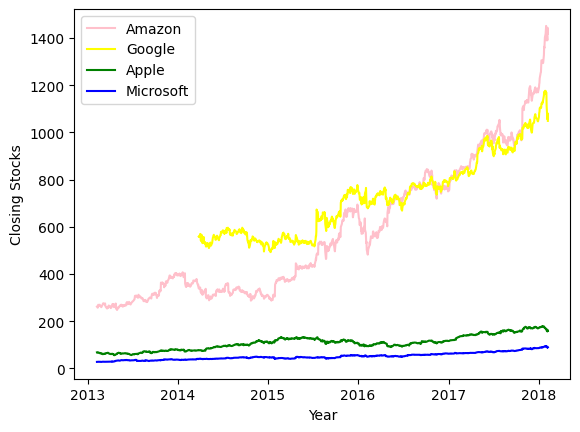

In [121]:

plt.plot(amazon['date'], amazon['close'], label='Amazon',color='pink')
plt.plot(google['date'], google['close'], label='Google',color='yellow')
plt.plot(apple['date'], apple['close'], label='Apple',color='green')
plt.plot(microsoft['date'], microsoft['close'], label='Microsoft',color='blue')
plt.xlabel('Year')
plt.ylabel('Closing Stocks')
plt.legend()
plt.show()

## The lowest prices:

In [127]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=amazon['date'], y=amazon['low'], name='Amazon', line=dict(color='red')))
fig.add_trace(go.Scatter(x=google['date'], y=google['low'], name='Google', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=apple['date'], y=apple['low'], name='Apple', line=dict(color='green')))
fig.add_trace(go.Scatter(x=microsoft['date'], y=microsoft['low'], name='Microsoft', line=dict(color='blue')))

fig.update_layout(xaxis_title='Year', yaxis_title='Low Stocks')
fig.show()

## The high prices:


In [126]:
# plt.plot(amazon['date'], amazon['high'], label='Amazon',color='pink')
# plt.plot(google['date'], google['high'], label='Google',color='yellow')
# plt.plot(apple['date'], apple['high'], label='Apple',color='green')
# plt.plot(microsoft['date'], microsoft['high'], label='Microsoft',color='blue')
# plt.xlabel('Year')
# plt.ylabel('High Stocks')
# plt.legend()
# plt.show()
fig = go.Figure()

fig.add_trace(go.Scatter(x=amazon['date'], y=amazon['high'], name='Amazon', line=dict(color='red')))
fig.add_trace(go.Scatter(x=google['date'], y=google['high'], name='Google', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=apple['date'], y=apple['high'], name='Apple', line=dict(color='green')))
fig.add_trace(go.Scatter(x=microsoft['date'], y=microsoft['high'], name='Microsoft', line=dict(color='blue')))

fig.update_layout(xaxis_title='Year', yaxis_title='High Stocks')
fig.show()


## 5- The average mean of Volume

In [130]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=amazon['date'], y=amazon['volume'], name='Amazon', line=dict(color='red')))
fig.add_trace(go.Scatter(x=google['date'], y=google['volume'], name='Google', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=apple['date'], y=apple['volume'], name='Apple', line=dict(color='green')))
fig.add_trace(go.Scatter(x=microsoft['date'], y=microsoft['volume'], name='Microsoft', line=dict(color='blue')))

fig.update_layout(xaxis_title='Year', yaxis_title='Volume Of  Stocks')
fig.show()